# [Introduction: Home Credit Default Risk Competition](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)


 이 notebook은 machine learning competition에 처음 참가하거나 부드러운 입문을 원하는 사용자를 대상으로 합니다. 저는 기계 학습의 기본을 보여주기 위해 복잡한 모델에 뛰어들거나 많은 데이터를 결합하는 것을 의도적으로 피합니다! 어떠한 의견이나 제안도 대단히 감사합니다.
  이 notebook은 현재 Kaggle에서 개최되고 있는 Home Credit Default Risk Machine Learning 경연대회를 처음 살펴보겠습니다. 이 competition의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것입니다. 이것은 표준적인 supervised classification task입니다.

 - supervised learning : label은 training data에 포함되고 목표는 모델을 학습시켜 특징으로부터 label을 예측하는 것을 배우는 것입니다.
 - classification : label은 이진 변수이다. 0(대출금을 상환), 1(대출 상환에 어려움이 있음)


 Manual feature engineering은 지루한 과정일 수 있으며(그래서 feature tool과 함께 자동 feature engineering을 하는 것입니다.) 종종 도메인 전문 지식에 의존합니다. 저는 대출과 채무 불이행의 원인이 되는 것에 대한 제한된 지식을 가지고 있기 때문에 최종 training dataframe에서 가능한 한 많은 정보를 얻는데 집중하겠습니다. 모델들이 우리가 그것을 결정하는 것 보다 어떤 feature가 중요한지 선택하는 것이라고 할 수 있습니다. 기본적으로 우리의 접근방식은 가능한 한 많은 feature를 만들고 모든 feature를 모델에서 사용할 수 있게 제공하는 것입니다. 이후에 모델에서 feature importance(변수중요도)를 가져오거나 PCA와 같은 기법을 사용하여 feature reduction을 수행할 수 있습니다.




# Data

데이터는 Home Credit에서 제공되며, Home Credit은 은행계좌가 없는 사람들에 대한 신용 한도(대출금)를 제공하기 위한 전용 서비스입니다. 고객이 대출금을 상환할 것인지, 또는 대출에 어려움을 겪을 것인지를 예측하는 것은 중요한 비즈니스 요구이며, Home Credit은 기계 학습 커뮤니티가 이 과제에 도움을 줄 수 있는 어떤 종류의 모델을 개발할 수 있는지를 알아보기 위해 Kaggle에서 이 competition을 개최했습니다.

다음과 같은 7개의 데이터 source가 있습니다.

- application_train/application_test: Home Credit의 각 대출 신청에 대한 정보가 포함된 main training, test 데이터입니다. 모든 대출에는 자체 row가 있으며 기능 SK_ID_CURR로 식별됩니다. The training application data는 TARGET과 함께 제공됩니다. 0 : 대출이 상환되었다. 1 : 대출이 상환되지 않았다
- bureau : 다른 금융 기관으로부터의 고객의 이전 신용에 관한 데이터입니다. 각 이전 신용대출(credit)은 bureau에 row가 있지만 applicaion data에서 하나의 대출은 여러 개의 이전 신용 대출(credit)을 가질 수 있습니다.
- bureau_balance : bureau의 이전 신용 대출에 대한 월별 데이터입니다. 각 row는 이전 신용 대출(credit)의 한 달이며 하나의 이전 신용 대출은 여러 개의 row(신용대출 기간의 각 한달)를 가질 수 있습니다.
- previous_application : Home Credit에서 대출한 적이 있었던 고객의  대출 신청서 data. applicaion data에 있는 현재의 각 대출은 여려 개의 이전 대출 기록을 가질 수 있습니다. 각 이전 대출 신청서는 SK_ID_PREV로 식별됩니다.
- POS_CASH_BALANCE : 고객이 홈 크레딧에 가지고 있던 이전 판매 지점 또는 현금 대출에 대한 월별 데이터입니다. 각 row는 이전 판매 지점 또는 현금 대출 지점의 한 달이며, 한 번의 이전 대출에는 여러 row가 있을 수 있습니다.
- credit_card_balance : 고객이 홈 크레딧으로 이전 신용 카드에 대한 월별 데이터입니다. 각 행은 신용 카드 잔액의 1개월이며, 하나의 신용 카드에는 여러 행이 있을 수 있습니다.
- installments_payment : Home Credit의 이전 대출에 대한 납부 내역입니다. 납부 때마다 row가 하나씩 있고 미납 때마다 row가 하나씩 있습니다.

이 다이어그램은 모든 데이터가 어떻게 관련되어 있는지 보여 줍니다.

![data diagram](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

또한 모든 column(HomeCredit_columns_description.csv)의 정의와 예상 제출 파일의 예를 제공합니다.

 이 노트북에서는 main applicaion  traing, test data만 사용합니다. 우리가 진지하게 경쟁하기를 원한다면, 우리는 모든 데이터를 사용해야 합니다. 우선은 우리는 감당할 수 있는 파일 하나를 고수할 것입니다. 이를 통해 향상할 수 있는 기준을 마련할 수 있습니다. 이 프로젝트들을 통해, 모든 방법을 동원해서 완전히 길을 잃기 보다는 한번에 조금씩 문제에 대한 이해를 쌓는 것이 가장 좋습니다!

# Metric: ROC AUC

데이터를 파악한 후에는(column 설명을 읽는 것이 매우 도움이 됨) 제출을 판단하는 척도를 이해해야 합니다. 이 경우, [Receiver Operating Characteristic Area Under the Curve(ROC AUC, AUROC라고도 함)](https://nittaku.tistory.com/297)으로 알려진 일반적인 분류 메트릭입니다.

ROC AUC는 위협적으로 들릴 수 있지만, 일단 여러분이 두 개의 개별적인 개념을 이해할 수 있다면 그것은 비교적 간단합니다. ROC(Reciever Operating Characteristic) 곡선은 true positive 대 false positive 비율을 그래프로 표시합니다.

![](http://www.statisticshowto.com/wp-content/uploads/2016/08/ROC-curve.png)

그래프의 한 선은 단일 모델의 곡선을 나타내며, 선을 따라 이동하면 positive  instance 분류에 사용되는 임계값이 변경됨을 나타냅니다. 임계값은 오른쪽 상단의 0에서 시작하여 왼쪽 하단의 1로 이동합니다. 다른 원곡선보다 왼쪽인 곡선은 더 나은 모형을 나타냅니다. 예를 들어, 파란색 모델이 빨간색 모델보다 낫습니다. 검은색 대각선 선보다 나은 것은 naive 랜덤 추측 모델을 나타냅니다.

AUC(Area Under the Curve, AUC) 아래에 있는 영역은 이름으로 설명됩니다! 단순하게 ROC 곡선 아래의 영역입니다. (이것은 곡선의 적분입니다.) 이 메트릭은 0에서 1 사이이며 더 나은 모델의 점수가 더 높습니다. 무작위로 추측하는 모델의 ROC AUC는 0.5입니다.

ROC AUC에 따라 분류기를 측정할 때 0 또는 1 예측을 생성하지 않고 0과 1 사이의 확률입니다. 이것은 우리가 보통 정확성 측면에서 생각하는 것을 좋아하기 때문에 혼란스러울 수 있지만, 우리가 불균형적인 클래스에 문제가 생길 때, 정확성은 최선의 측정기준이 아닙니다. 예를 들어, 제가 99.9999%의 정확도로 테러리스트를 탐지할 수 있는 모델을 만들고 싶다면, 저는 모든 사람이 테러리스트가 아니라고 예측하는 모델을 만들 것입니다. 분명히, 이것은 효과적이지 않을 것이고(리콜은 0이 될 것입니다) 우리는 분류기의 성능을 더 정확하게 반영하기 위해 ROC AUC나 F1 점수와 같은 더 진보된 지표를 사용합니다. ROC AUC가 높은 모델도 정확도가 높지만 ROC AUC는 모델 성능을 더 잘 나타냅니다.

우리가 사용하고 있는 데이터의 배경과 최대화할 메트릭을 알고 있는 것은 아닙니다. 이제 데이터를 살펴보도록 하겠습니다. 앞서 언급한 바와 같이 이 노트북에서는 향후 작업에 활용할 수 있는 주요 데이터 소스와 단순한 모델을 고수할 것입니다.

## Follow-up Notebooks

이 문제를 계속 해결하고자 하는 분들을 위해 여러 가지 후속 노트북이 있습니다.

- [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
- [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
- [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
- [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
- [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
- [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
- [Automated Model Tuning](https://www.kaggle.com/willkoehrsen/automated-model-tuning)
- [Model Tuning Results](https://www.kaggle.com/willkoehrsen/model-tuning-results-random-vs-bayesian-opt/notebook)



# Imports

우리는 일반적인 data science stack을 사용하고 있습니다. numpy, pandas, sklearn, matplotlib

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

먼저 우리는 사용 가능한 모든 데이터 파일을 나열할 수 있습니다. training을 위한 main file 1개, testing을 위한 main file 1개, 제출 예제 파일 1개, 각 대출에 대한 추가 정보가 포함된 기타 파일 6개 등, 총 9개의 파일이 있습니다.

In [2]:
# List files available
os.listdir("./drive/My Drive/JustKaggle/home-credit-risk")

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'sample_submission.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv']

In [3]:
# Training data
app_train = pd.read_csv('./drive/My Drive/JustKaggle/home-credit-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


training data는 307511개의 관측치(각각 개별 대출)와 TARGET(예측하고자 하는 label)을 포함한 122개의 feature(varialbe)를 가지고 있습니다.

In [4]:
# Testing data features
app_test = pd.read_csv('./drive/My Drive/JustKaggle/home-credit-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test set은 train set보다 작고 TARGET이 없습니다.

# Exploratory Data Analysis

탐색적 데이터 분석(EDA)은 통계를 계산하고 수치를 만들어 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾는 개방형 프로세스입니다. EDA의 목표는 데이터를 통해 무엇을 알 수 있는지 알아보는 것입니다. EDA의 목표는 데이터를 통해 무엇을 알 수 있는지 알아보는 것입니다. 일반적으로 높은 수준의 개요에서 시작하여 데이터의 흥미로운 영역을 발견함에 따라 특정 영역으로 좁혀집니다. 이러한 결과는 그 자체로도 흥미롭거나, 사용할 feature를 결정하는 데 도움이 되는 등 모델 선택에 유용한 정보를 제공하는 데 사용될 수 있습니다.

## TARGET column의 분포 조사

목표는 대출에 대해 0:제때 상환되었거나 1:고객이 지불에 어려움을 겪었다는 것을 예측하라는 것입니다. 우리는 우선 각 범주에 속하는 대출의 수를 조사할 수 있습니다. 

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

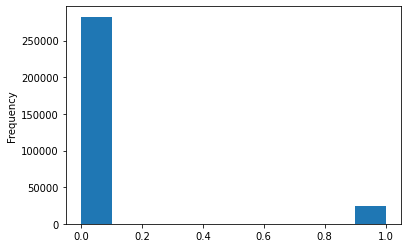

In [6]:
app_train['TARGET'].astype(int).plot.hist();

이 정보를 통해 우리는 이것이 불균형한 class 문제라는 것을 알 수 있습니다. 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많습니다. 우리가 좀 더 정교한 machine learning model에 들어가게 되면,우리는 데이터의 표현에 따라 이러한 불균형을 반영하기 위해 class에 가중치를 부여할 수 있습니다.

## 결측치 조사

다음으로 각 column에 있는 결측치의 수와 비율을 살펴볼 수 있습니다.

In [0]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


machine learning model을 제작할 때가 되면 우리는 이러한 결측치를 채워야 할 것입니다(Imputation(대치법?)이라고 함). 이후 작업에서는 imputation 없이 결측치을 처리할 수 있는 XGBoost와 같은 모델을 사용할 예정입니다. 다른 옵션은 누락된 값의 비율이 높은 열을 삭제하는 것입니다. 이러한 열이 모델에 도움이 될지는 미리 알 수 없습니다. 따라서 당분간은 모든 칼럼을 보관하겠습니다.

## Column Types

각 column의 데이터 유형의 수를 살펴보겠습니다. int64와 float64가 numeric 변수입니다(이산적이거나 연속적일 수 있음). object column은 문자열을 포함하고 범주형 feature 입니다.

In [9]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

각 object(범주형) column의 유일한 값를 살펴보겠습니다.

In [10]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

범주형 변수의 대부부은 비교적 적은 수의 unique entries를 가집니다. 우리는 이 범주형 변수들을 다룰 방법을 찾아야 할 것입니다!

## 범주형 변수 Encoding 

더 나아가기 전에, 우리는 성가신 범주형 변수를 다뤄야 합니다. machine learning model은 안타깝게도 범주형 변수를 처리할 수 없습니다 (LightGBM과 같은 일부 모델은 제외). 따라서 우리는 이러한 변수를 모델에 전달하기 전에 숫자로 인코딩하는 방법을 찾아야 합니다. 이 프로세스를 수행하는 방법에는 크게 두 가지가 있습니다.
- Label encoding: 범주형 변수의 각 고유 범주를 정수로 지정합니다. 새 열이 생성되지 않습니다. 아래에 예제가 나와 있습니다.

![Label encoding](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

- One-hot encoding: 범주형 변수의 각 고유 범주에 대해 새 column을 생성합니다. 각 관측치는 해당 카테고리에 대해 column에 1을, 다른 모든 column에 0을 각각 받습니다.

label encoding의 분제는 범주에 임의의순서를 부여한다는 점입니다. 각 범주에 할당된 값은 랜덤이며 범주의 고유한 측면을 반영하지 않습니다. 위의 예에서, 프로그래머는 4명, 데이터 과학자는 1명입니다. 하지만 우리가 같은 과정을 다시 했었다면 label은 뒤집히거나 완전히 달라질 수 있습니다. 정수의 실제 할당은 임의입니다. 따라서 label encoding을 수행할 때, 모델은 feature의 상대적인 값(예: 프로그래머 = 4, 데이터 과학자 = 1)을 사용하여 우리가 원하는 가중치를 할당할 수 있습니다. 범주형 변수(예: 남성/여성)에 대해 고유한 값이 두 개뿐이라면 label encoding도 괜찮지만 두 개 이상의 범주가 있을 경우 one-hot encoding이 안전한 옵션입니다.

이러한 접근방식의 상대적 장점에 대한 약간의 논쟁이 있으며, 어떤 모델들은 아무런 문제 없이 분류된 범주형 변수를 다룰 수 있습니다. [여기 좋은 스택 오버플로우 토론이 있습니다.](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor) 저는 많은 클래스를 가진 범주형 변수에 대해 (그리고 이것은 개인적인 의견일 뿐) One-hot encoding이 가장 안전한 접근법이라고 생각합니다. 왜냐하면 그것은 범주에 임의적인 값을 부과하지 않기 때문입니다. 1-hot 인코딩의 유일한 단점은 피쳐 수(데이터의 치수)가 많은 범주형 변수로 폭발할 수 있다는 것입니다. 이를 위해 PCA 또는 기타 차원 축소
 방법을 통해 One-hot encoding을 수행할 수 있습니다(정보 보존을 위해).

이 notebook에서는 두 개의 범주만 있는 범주형 변수에 대해서 label encoding을 사용하고 2개 이상의 범주를 가지고 있는 범주형 변수에 대해서는One-Hot Encoding을 사용합니다.

## Label Encoding과 One-Hot Encoding
위에서 설명한 정책을 실행해 보겠습니다.2개의 고유한 범주가 있는 범주형 변수(dtype == object)에 대해서는 label encoding을 사용하고, 두 개 이상의 고유한 범주가 있는 범주형 변수에 대해서는 one-hot encoding을 사용합니다.

label encoding에는 Scikit-Learn `LableEncoder`를 사용하고 one-hot encoding에는 pandas `get_dummies(df)` 함수를 사용합니다.


In [11]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Training and Testing Data 정렬

training과 testing data에는 같은 feature(column)이 필요합니다. One-hot encoding으로 training data에 더 많은 column이 생성되었습니다. testing data에 표시되지 않은 범주형 변수가 일부 있었기 때문입니다. testing data에 없는 training data의 column을 제거하려면, dataframe을 정렬해야 합니다. 먼저 training data의 대상 column을 추출합니다. (왜냐하면 이 정보는 testing data에는 없지만 정보를 유지해ㅇ하기 때문입니다. 정렬을 수행할 때, row가 아니라 column을 기준으로 dataframe을 정렬하려면 `axis = 1`로 설정해야 합니다.

In [13]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


이제 training과 testing dataset은 machine learing에 필요한 동일한 feature를 가지고 있습니다. feature의 수는 one-hot encoding 때문에 크게 증가했습니다. dataset의 크기를 줄이기 위해 차원 축소를 시도해야할 수도 있습니다.

## Back to Exploratory Data Analysis

### 이상치

EDA를 수행할 때 항상 주시하고 싶은 한 가지 문제는 데이터 내의 이상치입니다. 이는 잘못 입력된 숫자, 측정 장비 오류 또는 유효하지만 극단적인 측정 때문일 수 있습니다. 이상치를 양적으로 지원하는 방법은 `describe` 함수를 사용해 column의 통계를 보는 것입니다. DAYS_BIRTH column에 있는 숫자는 음수입니다.현재 대출 신청에 대해 상대적으로 기록하기 때문입니다. 연도를 보기 위해서는 -1을 곱하고 1년의 일수로 나눌 수 있습니다.

In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이들은 합리적으로 보입니다. 높거나 낮은 쪽에는 나이에 대한 특이치가 없습니다. 취직날은 어떤가요?

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

그건 옳지 않아 보입니다! 최대값(양수 값 제외)은 약 1000년입니다!

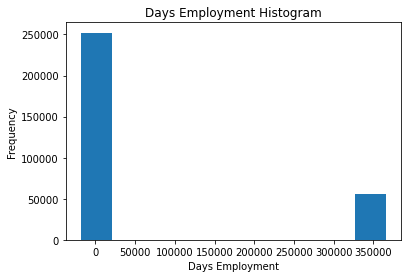

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

이상하게도, 이상치를 가진 고객을 하위 집합으로 설정하여 나머지 고객보다 높은 또는 낮은 채무불이행(default) 비율을 가지는 경향이 있는지 살펴보겠습니다.

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


매우 흥미롭습니다! 이상치는 낮은 채무 불이행 비율을 가지고 있는 것으로 나타났습니다.

이상치를 처리하는 방법은 정해진 규칙이 없이 정확한 상황에 따라 달라집니다. 가장 안전한 방법 중 하나는 이상치를 결측치로 설정한 다음 machine learning 학습 전에 이를 채우는 것입니다(imputation 대치법을 사용). 이번 경우에는 모든 이상치가 정확히 동일한 값을 가지기 때문에 공통점을 공유하는 경우를 대비하여 동일한 값으로 채우려고 합니다. 이 이상치는 어떤 중요한 의미를 가진 것으로 보입니다. 그래서 실제로 이러한 값을 채우면 기계 학습 모델에 알려야합니다. 해결책으로서, 비정상적인 값을 숫자가 아닌 숫자(np.nan)로 채운 다음, 해당 값이 비정상적이었는지 여부를 나타내는 boolean column을 새로 생성합니다.

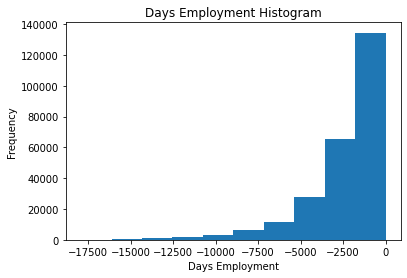

In [18]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

분포는 우리가 예상하는 값과 훨씬 더 일치하는 것으로 보이며, 또한 우리는 이러한 값이 원래 이상치였다고 모델에게 알리기 위해 새로운 column을 만들었습니다(왜냐하면 우리는 어느 정도의 값, 아마도 열의 중앙값을 사용하여 nan을 채워야 할 것입니다). 데이터 프레임에 DAYS가 있는 다른 열은 뚜렷한 특이치가 없는 것으로 예상합니다.

매우 중요한 사항으로서 training 데이터에 대해 수행하는 모든 작업은 testing 데이터에도 적용해야 합니다. 새 column을 만들고 testing data에서 기존 column을 np.nan으로 채웁니다.

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## 상관 관계

이제 범주형 변수와 특이치를 다루었으니 EDA를 계속 진행해 보겠습니다. 데이터를 이해하려는 한 가지 방법은 feature와 target 간의 상관 관계를 찾는 것입니다.
`.corr` 데이터프레임 함수를 사용하여 모든 변수와 대상 사이의 피어슨 상관 계수를 계산할 수 있습니다.

상관 계수는 형상의 "관련성"을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다. [상관 계수의 절대 값에 대한 일반적인 해석](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)은 다음과 같습니다

- .00-.19 "very weak"
- .20-.39 "weak"
- .40-.59 "moderate"
- .60-.79 "strong"
- 0.80-1.0 "very strong"

In [20]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

좀 더 중요한 상관 관계를 살펴보겠습니다. `DAYS_BIRTH`는 가장 큰 양의 상관 관계입니다.(변수 자신과의 상관관계는 항상 1이기 때문에 TARGET은 제외합니다!)문서를 살펴보면, `DAYS_BIRTH`는 대출 시점의 고객의 나이 해당하는 음수 일수입니다(이유가 무엇이던지). 상관 관계는 양의 상관 관계이지만 이 feature의 값은 실제로 음수이므로 클라이언트가 나이가 들수록 대출의 채무불이행 발생률이 낮습니다.(즉 target == 0). 약간 혼란스러우니 feature에 절대값을 취하면 음의 상관관계가 됩니다.

## 상환에 대한 나이의 영항



In [21]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

고객이 나이가 들수록, target에 음의 선형 관계가 나타납니다.
고객이 나이가 들어감에 따라 target과 음의 선형 관계가 있음을 의미합니다. 클라이언트가 나이가 들수록 시간에 따라 대출금을 더 자주 상환하는 경향이 있습니다.

이 변수를 살펴보겠습니다. 먼저 우리는 나이에 대한 히스토그램을 만들 수 있습니다.
우리는 그래프를 좀 더 이해하기 쉽도록 x축을 나이로 합니다. 

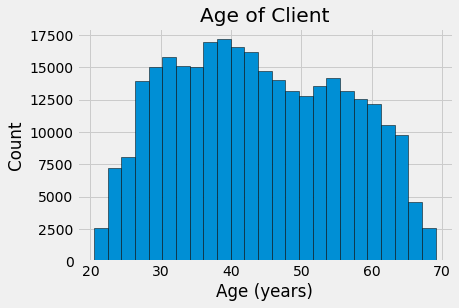

In [22]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

그 자체로, 나이의 분포는 모든 나이가 합리적이기 때문에 특이치가 없다는것 이외에는 우리에게 많은 것을 말해주지 않습니다. target에 대한 연령의 영향을 시각화하기 위해 다음으로는 target의 값에 따라 색을 입힌 커널 밀도 추정(KDE)을 만듭니다. 커널 밀도 추정 그래프는 단일 변수의 분포를 보여주고 smoothed 히스토그램(각 데이터 지점에서 커널(일반적으로 가우스)을 계산 한 다음 모든 개별 커널을 평균하여 단일의 smooth 곡선을 만듬)으로 간주할 수 있습니다. 우리는 이 그래프를 위해 seaborn kdeplot을 사용합니다.

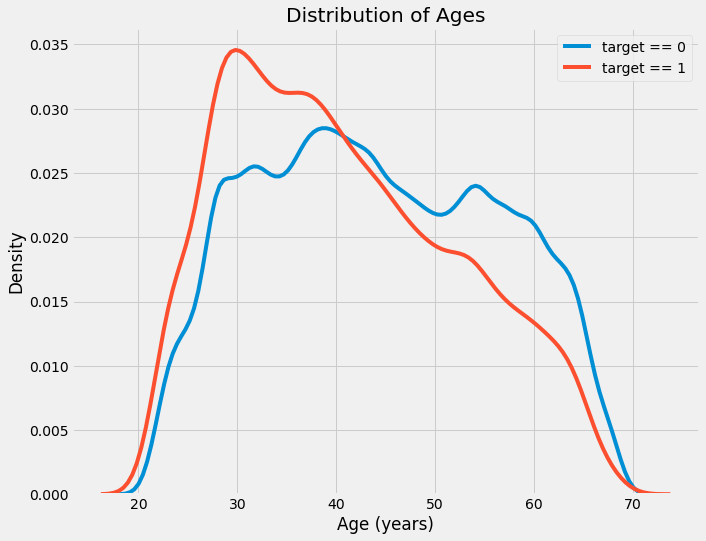

In [23]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

`target == 1`인 곡선이 범위의 나이가 젊은 쪽으로 치우칩니다.유의한 상관관계(상관계수 -0.07)는 아니지만 target에 영향을 주기 때문에 machin learning 모델에 유용할 수 있습니다. 이 관계를 연령대별로 평균적인 대출금 상환 실패라는 다른 방식으로 살펴보겠습니다.
 
 이 그래프를 만들기 위해서, 먼저 5년씩 묶어 나이 범주로 나눕니다. 그런 다음 각 범주별로 target의 값의 평균을 계산해 각 연령 범주에서 상환되지 않은 대출 비율을 알려줍니다.

In [24]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


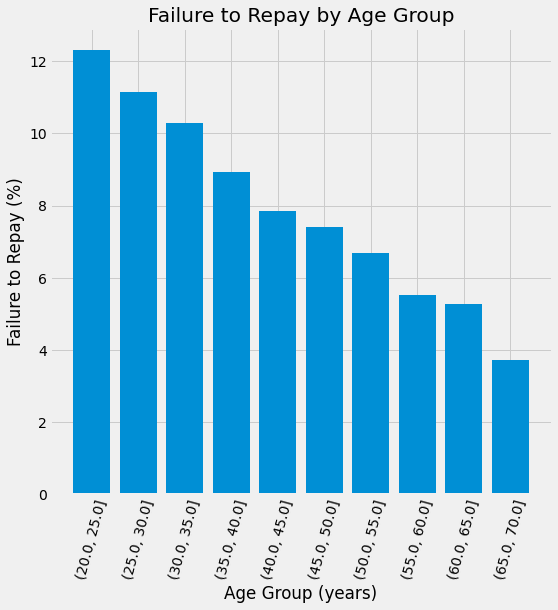

In [26]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

분명한 경향이 있습니다.: 젊은 지원자들은 대출금을 갚지 않을 가능성이 더 높습니다. 상환 불이행 비율은 가장어린 3 그룹의 경우 10% 이상이고 가장 나이가 많은 그룹의 경우 5% 미만입니다.

이것은 은행이 직접 사용할 수 있는 정보입니다.: 젊은 고객이 대출금을 상환할 가능성이 낮기 때문에, 아마 그들은 더 많은 안내나 재정적인 계획을 제공받아야 할 것입니다. 이것은 은행이 젊은 고객을 차별해야 한다는 것을 의미하지 않지만, 젋은 고객이 제때에 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.

## Exterior Sources

target과 음의 상관관계가 가장 강한 3개의 변수는 EXT_SOURCE_1, EXT_SOURCE_2 및 EXT_SOURCE_3입니다. 설명서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다. 이것이 정확히 무엇을 의미하는지 잘 모르겠습니다만, 그것은 수많은 자료 출처를 이용하여 이루어진 누적된 신용 등급일 수도 있습니다.

이 변수들을 보겠습니다.

먼저, 우리는 target과 각 `EXT_SOURCE` feature들의 상관관계를 보여줄 수 있습니다.

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

ERROR! Session/line number was not unique in database. History logging moved to new session 59


,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


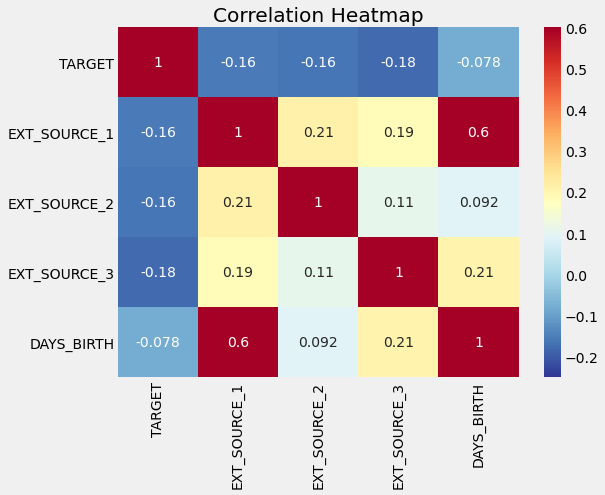

In [28]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

 세 `EXT_SOURCE` feature 모두 target과 음의 상관관계를 가지고 있어 `EXT_SOURCE`의 값이 높아질수록 고객은 대출금을 상환할 가능성이 높아집니다.
또한 `DAYS_BIRTH`가 `EXT_SOURCE_1`과 양의 상관관계가 있음을 알 수 있습니다. 이는 점수의 요인 중 하나가 고객 연령일 수 있음을 나타냅니다.

 다음에는 이러한 각 feature의 분포를 target의 값에 따라 색칠된 것을 볼 수 있습니다. 이 변수가 대상에 미치는 영향을 시각화할 수 있습니다.

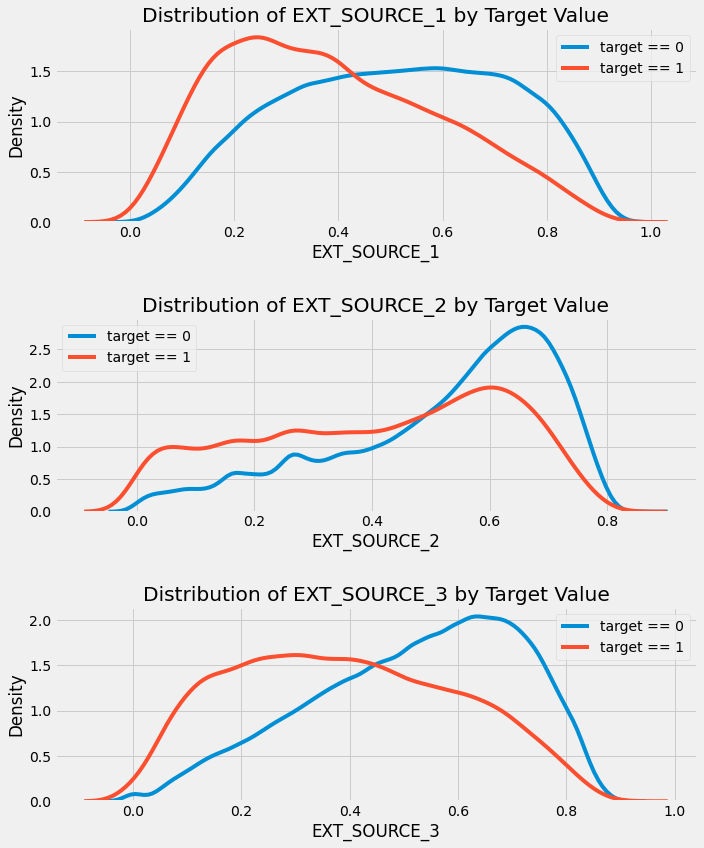

In [29]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

`EXT_SOURCE_3`은 target 값 사이에 가장 큰 차이를 보여줍니다.  우리는 이 feature가 대출 상환할 신청자의 가능성과 어느 정도 관계가 있음을 분명히 알 수 있습니다. 이 관계가 강하지는 않습니다.(사실 그들 모두 매우 약하다고 여겨지지만, 이러한 변수들은 여전히 machine learning 모델에 지원자가 제때에 대출금을 상환할지 여부를 예측하는데 유용할 것입니다.)

## 산점도

마지막 탐색 그래프로으로 `EXT_SOURCE` 변수와 `DAYS_BIRTH` 변수의 산점도를 만들 수 있습니다. 산점도(Pairs Plot)는 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 확인할 수 있습니다. 여기서는 Seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 위쪽 삼각형에는 산점도, 대각선에는 히스토그램, 아래쪽 삼각형에는 2D 커널 밀도 그림 및 상관 계수를 포함한 쌍 그림을 작성합니다.

 만약 당신이 이 코드를 이해하지 못해도 괜찮습니다! Python에서 그래프를 그리는 것은 매우 복잡하고 가장 단순한 그래프 이상의 경우에는 대개 기존에 구현된 코드를 찾아 수정합니다.

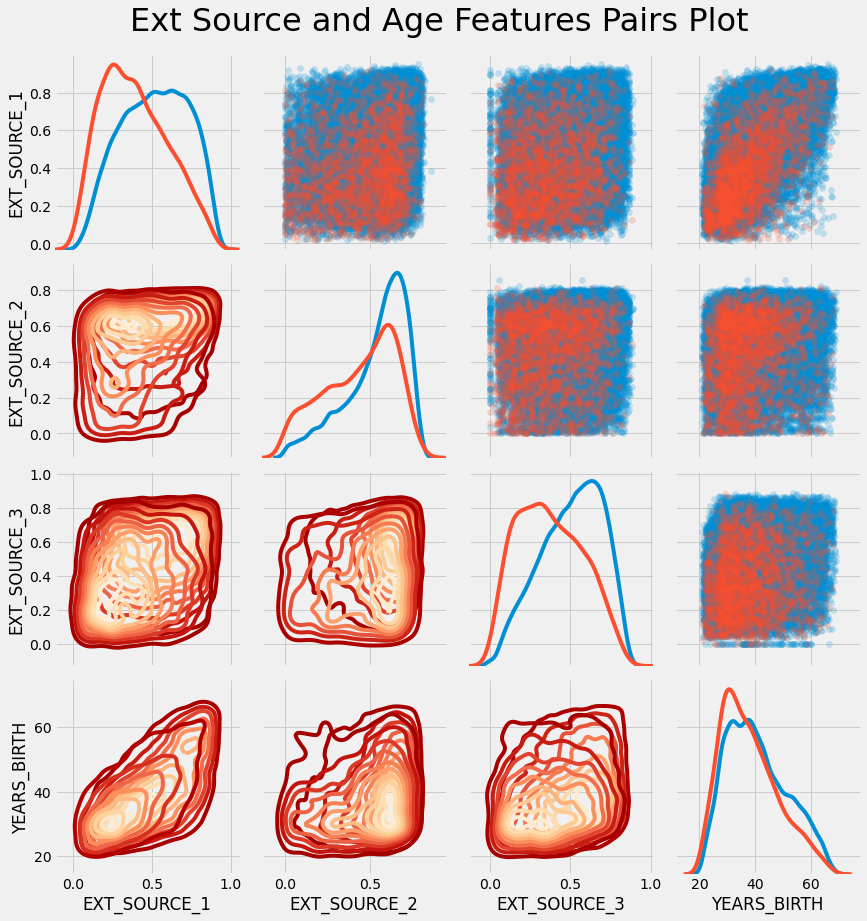

In [30]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

이 그래프에서 빨간색은 미상환된 대출을, 파란색은 상환된 대출을 의미합니다. 우리는 이 데이터 안에서 다른 관계를 볼 수 있습니다. `EXT_SOURCE_1`와 `DAYS_BIRTH`(또는 `YEARS_BIRTH`) 사이의 중간 정도의 양의 선형 관계가 있는 것으로 나타나 이 feature가 고객의 나이를 나이를 고려할 수 있음을 나타냅니다.